Identifying Regulatory Changes to Facilitate Nitrogen Fixation in the Nondiazotroph Synechocystis sp. PCC 6803

https://pubs.acs.org/doi/full/10.1021/acssynbio.5b00202

0 or 1 or 2 or 3 denoting negative or positive or feedback or unknown interaction

In [1]:
#importing the modules
import networkx as nx
import matplotlib.pyplot as pl


In [2]:
G3 = nx.Graph()
nodes = ['patB','nif cluster']
edges = [('patB','nif cluster',{'weight':3})]

G3.add_nodes_from(nodes)
G3.add_edges_from(edges)

C:\Users\Deepro\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


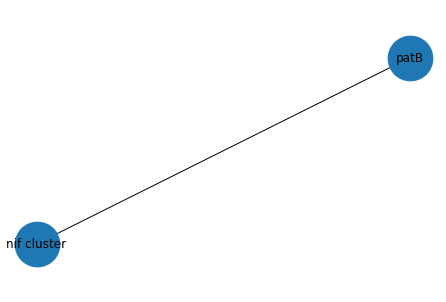

In [3]:
nx.draw(G3,with_labels=True,node_size=2000)

In [4]:
# import the data in pandas 
import numpy as np
import networkx as nx
import pandas as pd
raw_df = pd.read_excel("5-Gene-TF cluster.xlsx",sheet_name=3).dropna(how="all").reset_index(drop=True)

# TF

In [5]:
raw_df.head()

,Genes,Gene Annotation
0,TF Cluster number: 1,NaN
1,cce_0115,response regulator
2,cce_0145,putative circadian clock protein; kaiB4
3,cce_0452,hypothetical protein containing a transcriptio...
4,cce_0453,putative transcriptional regulator AbrB


In [6]:
inds = pd.isnull(raw_df).any(1).to_numpy().nonzero()[0]
raw_df[raw_df.iloc[0,0][:17]] = 1
previdx = inds[0]
for idx in range(len(inds[1:])):
    nextidx = inds[idx+1]
    raw_df.loc[previdx:nextidx+1,'TF Cluster number'] = idx+1
    previdx = nextidx+1

raw_df.loc[nextidx+1:,'TF Cluster number'] = idx+2
df = raw_df.dropna().reset_index(drop=True)

In [7]:
df.head()

,Genes,Gene Annotation,TF Cluster number
0,cce_0115,response regulator,1
1,cce_0145,putative circadian clock protein; kaiB4,1
2,cce_0452,hypothetical protein containing a transcriptio...,1
3,cce_0453,putative transcriptional regulator AbrB,1
4,cce_0461,nitrogen-responsive regulatory protein; ntcA,1


In [8]:
def func1(row):
    if row['Gene Annotation'].find(';')!=-1:
        return row['Gene Annotation'][row['Gene Annotation'].find(';')+1:]
    else:
        return row['Genes']
df['Source'] = df.apply(func1,axis=1)
TF = df.dropna().reset_index(drop=True)

grouped_TF = TF.groupby('TF Cluster number')

for key in grouped_TF.groups.keys():
    Cluster = grouped_TF.get_group(key)
    Cluster.to_excel(f'5 - TJMDAta/TF_Cluster_{key}.xlsx',columns=['Source'])

In [9]:
TF.head()

,Genes,Gene Annotation,TF Cluster number,Source
0,cce_0115,response regulator,1,cce_0115
1,cce_0145,putative circadian clock protein; kaiB4,1,kaiB4
2,cce_0452,hypothetical protein containing a transcriptio...,1,cce_0452
3,cce_0453,putative transcriptional regulator AbrB,1,cce_0453
4,cce_0461,nitrogen-responsive regulatory protein; ntcA,1,ntcA


In [10]:
grouped_TF.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [11]:
tf1group = [key for key in grouped_TF.groups.keys() if len(grouped_TF.get_group(key))==1]

In [12]:
tf1group

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# TG

In [13]:
raw_df_g = pd.read_excel("5-Gene-TF cluster.xlsx",sheet_name=2).dropna(how="all").reset_index(drop=True)
inds_g = pd.isnull(raw_df_g).any(1).to_numpy().nonzero()[0]
# raw_df_g[raw_df_g.iloc[0,0][:17]] = 1

previdx = inds_g[0]
for idx in range(len(inds_g[1:])):
    nextidx = inds_g[idx+1]
    raw_df_g.loc[previdx:nextidx+1,'Cluster number'] = idx+1
    previdx = nextidx+1

raw_df_g.loc[nextidx+1:,'Cluster number'] = idx+2
df_g = raw_df_g.dropna().reset_index(drop=True)
df_g['Source'] = df_g.apply(func1,axis=1)
TG = df_g.dropna().reset_index(drop=True)
TG.head()

,Genes,Gene Annotation,Cluster number,Source
0,cce_0052,DUF1499-containing protein,1.0,cce_0052
1,cce_0082,conserved hypothetical protein,1.0,cce_0082
2,cce_0085,hypothetical protein,1.0,cce_0085
3,cce_0087,metallophosphoesterase,1.0,cce_0087
4,cce_0115,response regulator,1.0,cce_0115


In [14]:
grouped_TG = TG.groupby('Cluster number')

for key in grouped_TG.groups.keys():
    Cluster = grouped_TG.get_group(key)
    Cluster.to_excel(f'5 - TJMDAta/TG_Cluster_{key}.xlsx',columns=['Source'])

In [15]:
len(grouped_TG.groups.keys())

221

In [16]:
tg1group = [key for key in grouped_TG.groups.keys() if len(grouped_TG.get_group(key))==1]

In [17]:
len(tg1group)

104

# Interactions

In [18]:
intdf = pd.read_excel('5-TF-Cluster interaction.xlsx',sheet_name=1).dropna(how="all").reset_index(drop=True)

In [19]:
intdf

,Unnamed: 0,Cj value
0,Gene Cluster 1,NaN
1,tf1,-0.28718
2,tf4,-0.08586
3,tf7,0.09915
4,Gene Cluster 2,NaN
...,...,...
732,tf4,-0.27598
733,tf14,0.10620
734,Gene Cluster 221,NaN
735,tf2,0.37204


In [20]:
inds_int = pd.isnull(intdf).any(1).to_numpy().nonzero()[0]

In [21]:
len(inds_int)

221

In [22]:
inds_int = pd.isnull(intdf).any(1).to_numpy().nonzero()[0]
# raw_df_g[raw_df_g.iloc[0,0][:17]] = 1

previdx = inds_int[0]
for idx in range(len(inds_int[1:])):
    nextidx = inds_int[idx+1]
    intdf.loc[previdx:nextidx+1,'Cluster number'] = idx+1
    previdx = nextidx+1

intdf.loc[nextidx+1:,'Cluster number'] = idx+2
df_int = intdf.dropna().reset_index(drop=True)

In [23]:
df_int.columns = ['tfnum', 'cjval', 'tgnum']

In [24]:
type(df_int.loc[0,'tgnum'])

numpy.float64

In [25]:
type(tg1group[0])

float

In [26]:
df_int.head()

,tfnum,cjval,tgnum
0,tf1,-0.28718,1.0
1,tf4,-0.08586,1.0
2,tf7,0.09915,1.0
3,tf1,0.11915,2.0
4,tf2,0.11131,2.0


In [27]:
# make 1to1 mapping

#INCLUDE ONLY THOSE TFS WHICH HAS 1 GENE
tf1name = ['tf'+str(num) for num in tf1group]

interdf = df_int.loc[(df_int['tfnum'].isin(tf1name))&(df_int['tgnum'].isin(tg1group))].reset_index(drop=True)

In [28]:
interdf

,tfnum,cjval,tgnum
0,tf15,0.25506,118.0
1,tf12,-0.17641,119.0
2,tf13,-0.22214,119.0
3,tf16,0.23525,119.0
4,tf13,0.18068,120.0
...,...,...,...
162,tf16,0.15584,216.0
163,tf8,0.08986,217.0
164,tf15,0.58494,217.0
165,tf14,0.10620,220.0


In [29]:
df.columns

Index(['Genes', 'Gene Annotation', 'TF Cluster number', 'Source'], dtype='object')

In [30]:
interdf.head()

,tfnum,cjval,tgnum
0,tf15,0.25506,118.0
1,tf12,-0.17641,119.0
2,tf13,-0.22214,119.0
3,tf16,0.23525,119.0
4,tf13,0.18068,120.0


In [31]:
df.loc[df.loc[:,'TF Cluster number']==6]['Genes'].values[0]

'cce_4219'

In [32]:
TG.iloc[:1]

,Genes,Gene Annotation,Cluster number,Source
0,cce_0052,DUF1499-containing protein,1.0,cce_0052


In [33]:
TF.iloc[:1]

,Genes,Gene Annotation,TF Cluster number,Source
0,cce_0115,response regulator,1,cce_0115


In [34]:
def func2(row):
    #get tf orf
    tfasstr = row['tfnum']
    tfclustnum = int(tfasstr[2:])
    tfname = TF.loc[TF.loc[:,'TF Cluster number']==tfclustnum]['Genes'].values[0]
    #get tg orf
    tgclustnum = row['tgnum']
    tgname = TG.loc[TG.loc[:,'Cluster number']==tgclustnum]['Genes'].values[0]
    #get tf common name
    tfcomname = TF.loc[TF.loc[:,'TF Cluster number']==tfclustnum]['Source'].values[0]
    #get tg common name
    tgcomname = TG.loc[TG.loc[:,'Cluster number']==tgclustnum]['Source'].values[0]
    return pd.Series({'TF ORF':tfname,'TG ORF':tgname,'TF':tfcomname.strip(),'TG':tgcomname.strip()}) 


interdf = interdf.merge(interdf.apply(func2,axis=1),left_index=True,right_index=True)

In [35]:
interdf[interdf.loc[]]

,tfnum,cjval,tgnum,TF ORF,TG ORF,TF,TG
0,tf15,0.25506,118.0,cce_0601,cce_5302,sigE,cce_5302
1,tf12,-0.17641,119.0,cce_3378,cce_5288,cce_3378,cce_5288
2,tf13,-0.22214,119.0,cce_3127,cce_5288,cce_3127,cce_5288
3,tf16,0.23525,119.0,cce_0298,cce_5288,rpaA,cce_5288
4,tf13,0.18068,120.0,cce_3127,cce_5166,cce_3127,cce_5166
...,...,...,...,...,...,...,...
162,tf16,0.15584,216.0,cce_0298,cce_0319,rpaA,cce_0319
163,tf8,0.08986,217.0,cce_0556,cce_0303,cce_0556,cmpC
164,tf15,0.58494,217.0,cce_0601,cce_0303,sigE,cmpC
165,tf14,0.10620,220.0,cce_1520,cce_0042,cce_1520,cce_0042


In [37]:
interdf.to_excel('5 - TJMData/interTJM.xlsx')

supplementary information nitrogen fixation clusters 

https://pubs.acs.org/doi/suppl/10.1021/acssynbio.5b00202/suppl_file/sb5b00202_si_002.pdf

